In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, f1_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier, RandomForestClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import SVR, SVC


import pandas as pd
import codecs
import time
import datetime
import re
from datetime import datetime 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../Cal_Fire/df_acres', low_memory=False, index_col=False)

In [3]:
df.set_index('start_date', inplace=True)

In [4]:
df.isna().sum().sum()

0

In [5]:
to_drop = ['fire_department_name', 'incident_name',
                  'county', 'street_address',
                  'city', 'state', 'zip',
                  'burn_duration', 'cause', 'incident_number',
                 'type_descriptions', 'cross_streets_or_directions_or_national_grid',
                 'containment_date']

In [6]:
df.burn_duration.dtype

dtype('float64')

In [7]:
X = df.drop(columns=to_drop)
y = df['burn_duration']

In [8]:
df = df.loc[df['burn_duration']> .000 ]

In [9]:
df.shape

(41852, 1404)

In [10]:
df.head()

,fire_department_name,incident_number,exposure_number,incident_name,year,containment_date,county,street_address,city,state,...,Sonoma_y,Stanislaus_y,Sutter_y,Tehama_y,Trinity_y,Tulare_y,Tuolumne_y,Ventura_y,Yolo_y,Yuba_y
start_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,RIVERSIDE CFD,16,0,CASTLEROCK TRL MEAD,2013,2013-01-01 00:27:00,Riverside,00019275 CASTLEROCK TRL,MEAD,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 00:00:00,RIVERSIDE CFD,312,0,DATE PALM,2013,2013-01-01 19:03:00,Riverside,00065150 DATE PALM ST,MECC,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,CDF-SAN BERNARDINO,194,0,LA MIRADA RD PHELAN,2013,2013-01-05 19:27:00,San Bernardino,00010820 LA MIRADA RD,PHELAN,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,CDF-FRESNO,215,0,AUBERRY RD / ALDER HEIGHT,2013,2013-01-05 16:55:00,Fresno,00036709 PETERSON RD,Tollhouse,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,WILDOMAR FIRE DEPARTMENT,1752,0,PALOMAR,2013,2013-01-05 12:59:00,Riverside,00022800 PALOMAR ST,WILD,CA,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = df.loc[df['latitude']> 31 ]
df = df.loc[df['latitude']< 44 ]
df = df.loc[df['longitude']< -111 ]
df = df.loc[df['longitude']> -125]

In [12]:
# sns.scatterplot(
#     x = df['longitude'],
#     y = df['latitude'],
#     hue = df['burn_duration'],
#     palette = 'inferno',
#     markers = False,
#     sizes= (1)
# );

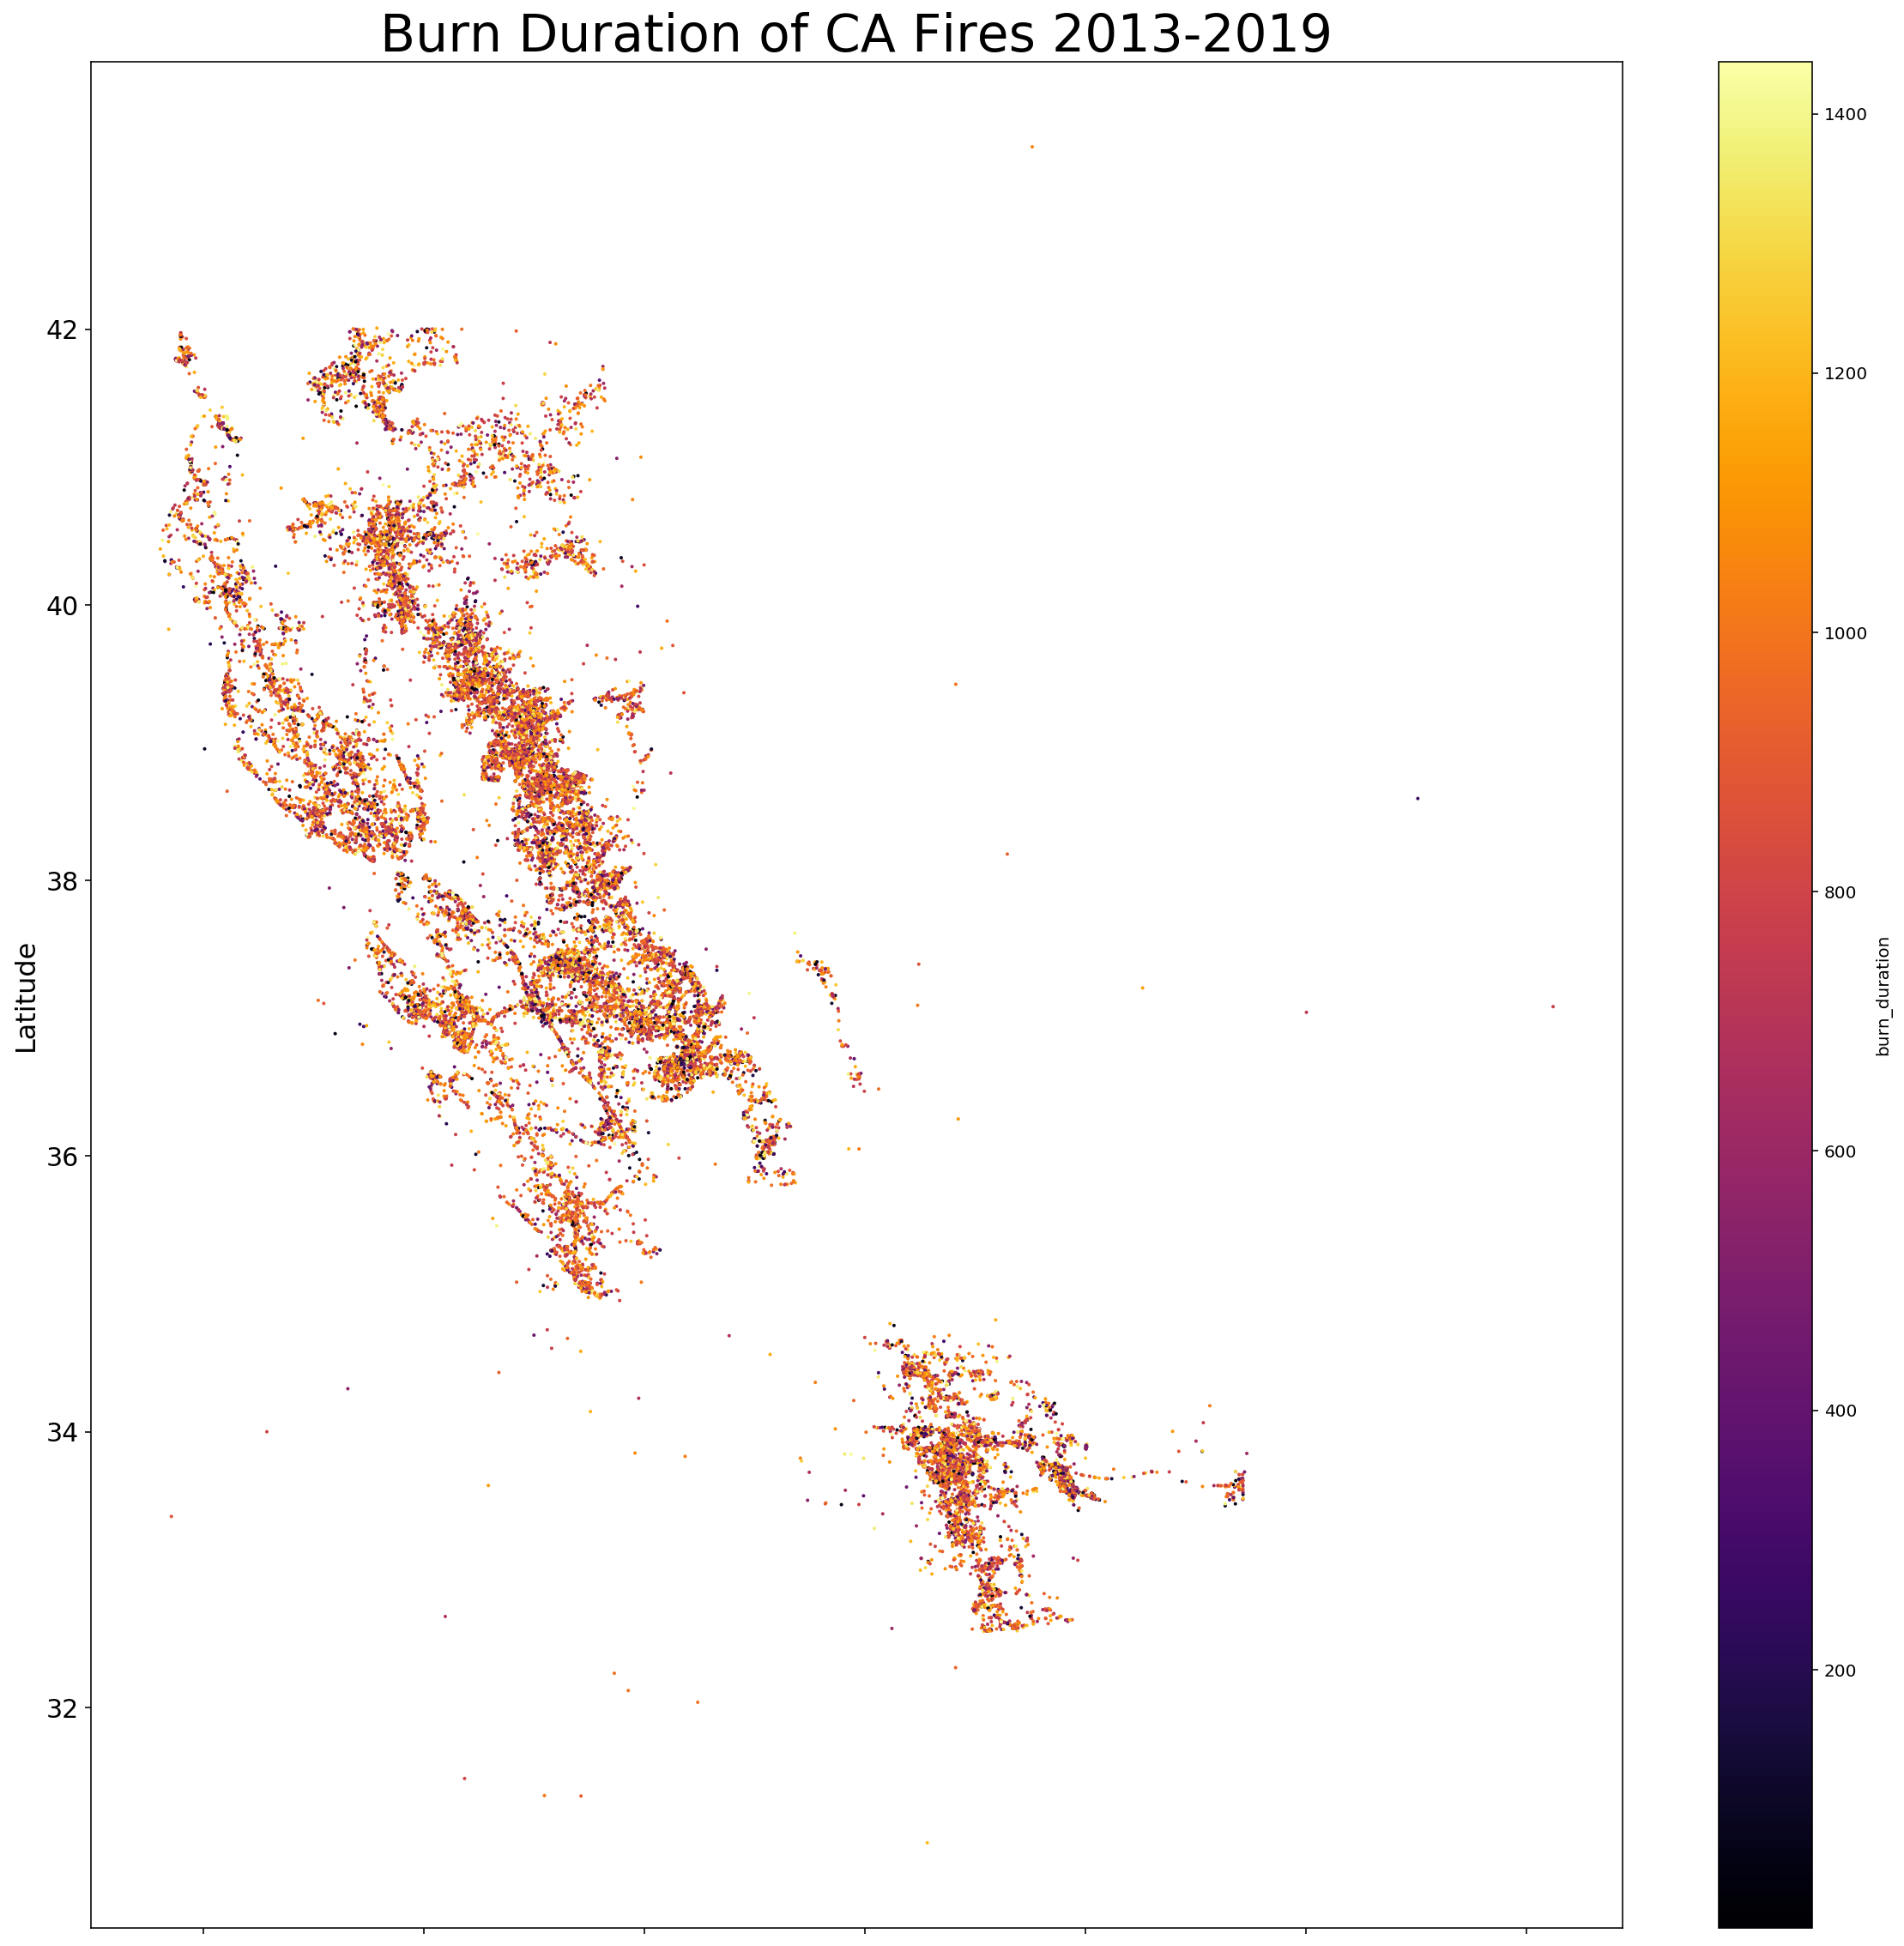

In [13]:
t = 'Burn Duration of CA Fires 2013-2019'

df.plot(kind="scatter",
        x="longitude", use_index= True,fontsize = 15,
        y="latitude",
        c="burn_duration", 
         cmap="inferno",
        
        legend = False,
        figsize=(20, 20), s=1);
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize = 16)
# plt.clabel('Burn Time in Minutes')
plt.title(t, fontsize=30);
# plt.xticks(list(range(df['longitude'])), df['longitude'].index, fontsize=12)

In [14]:
df.shape

(31777, 1404)

In [15]:
# df = df.loc[df['total_acres_burned']<.5]

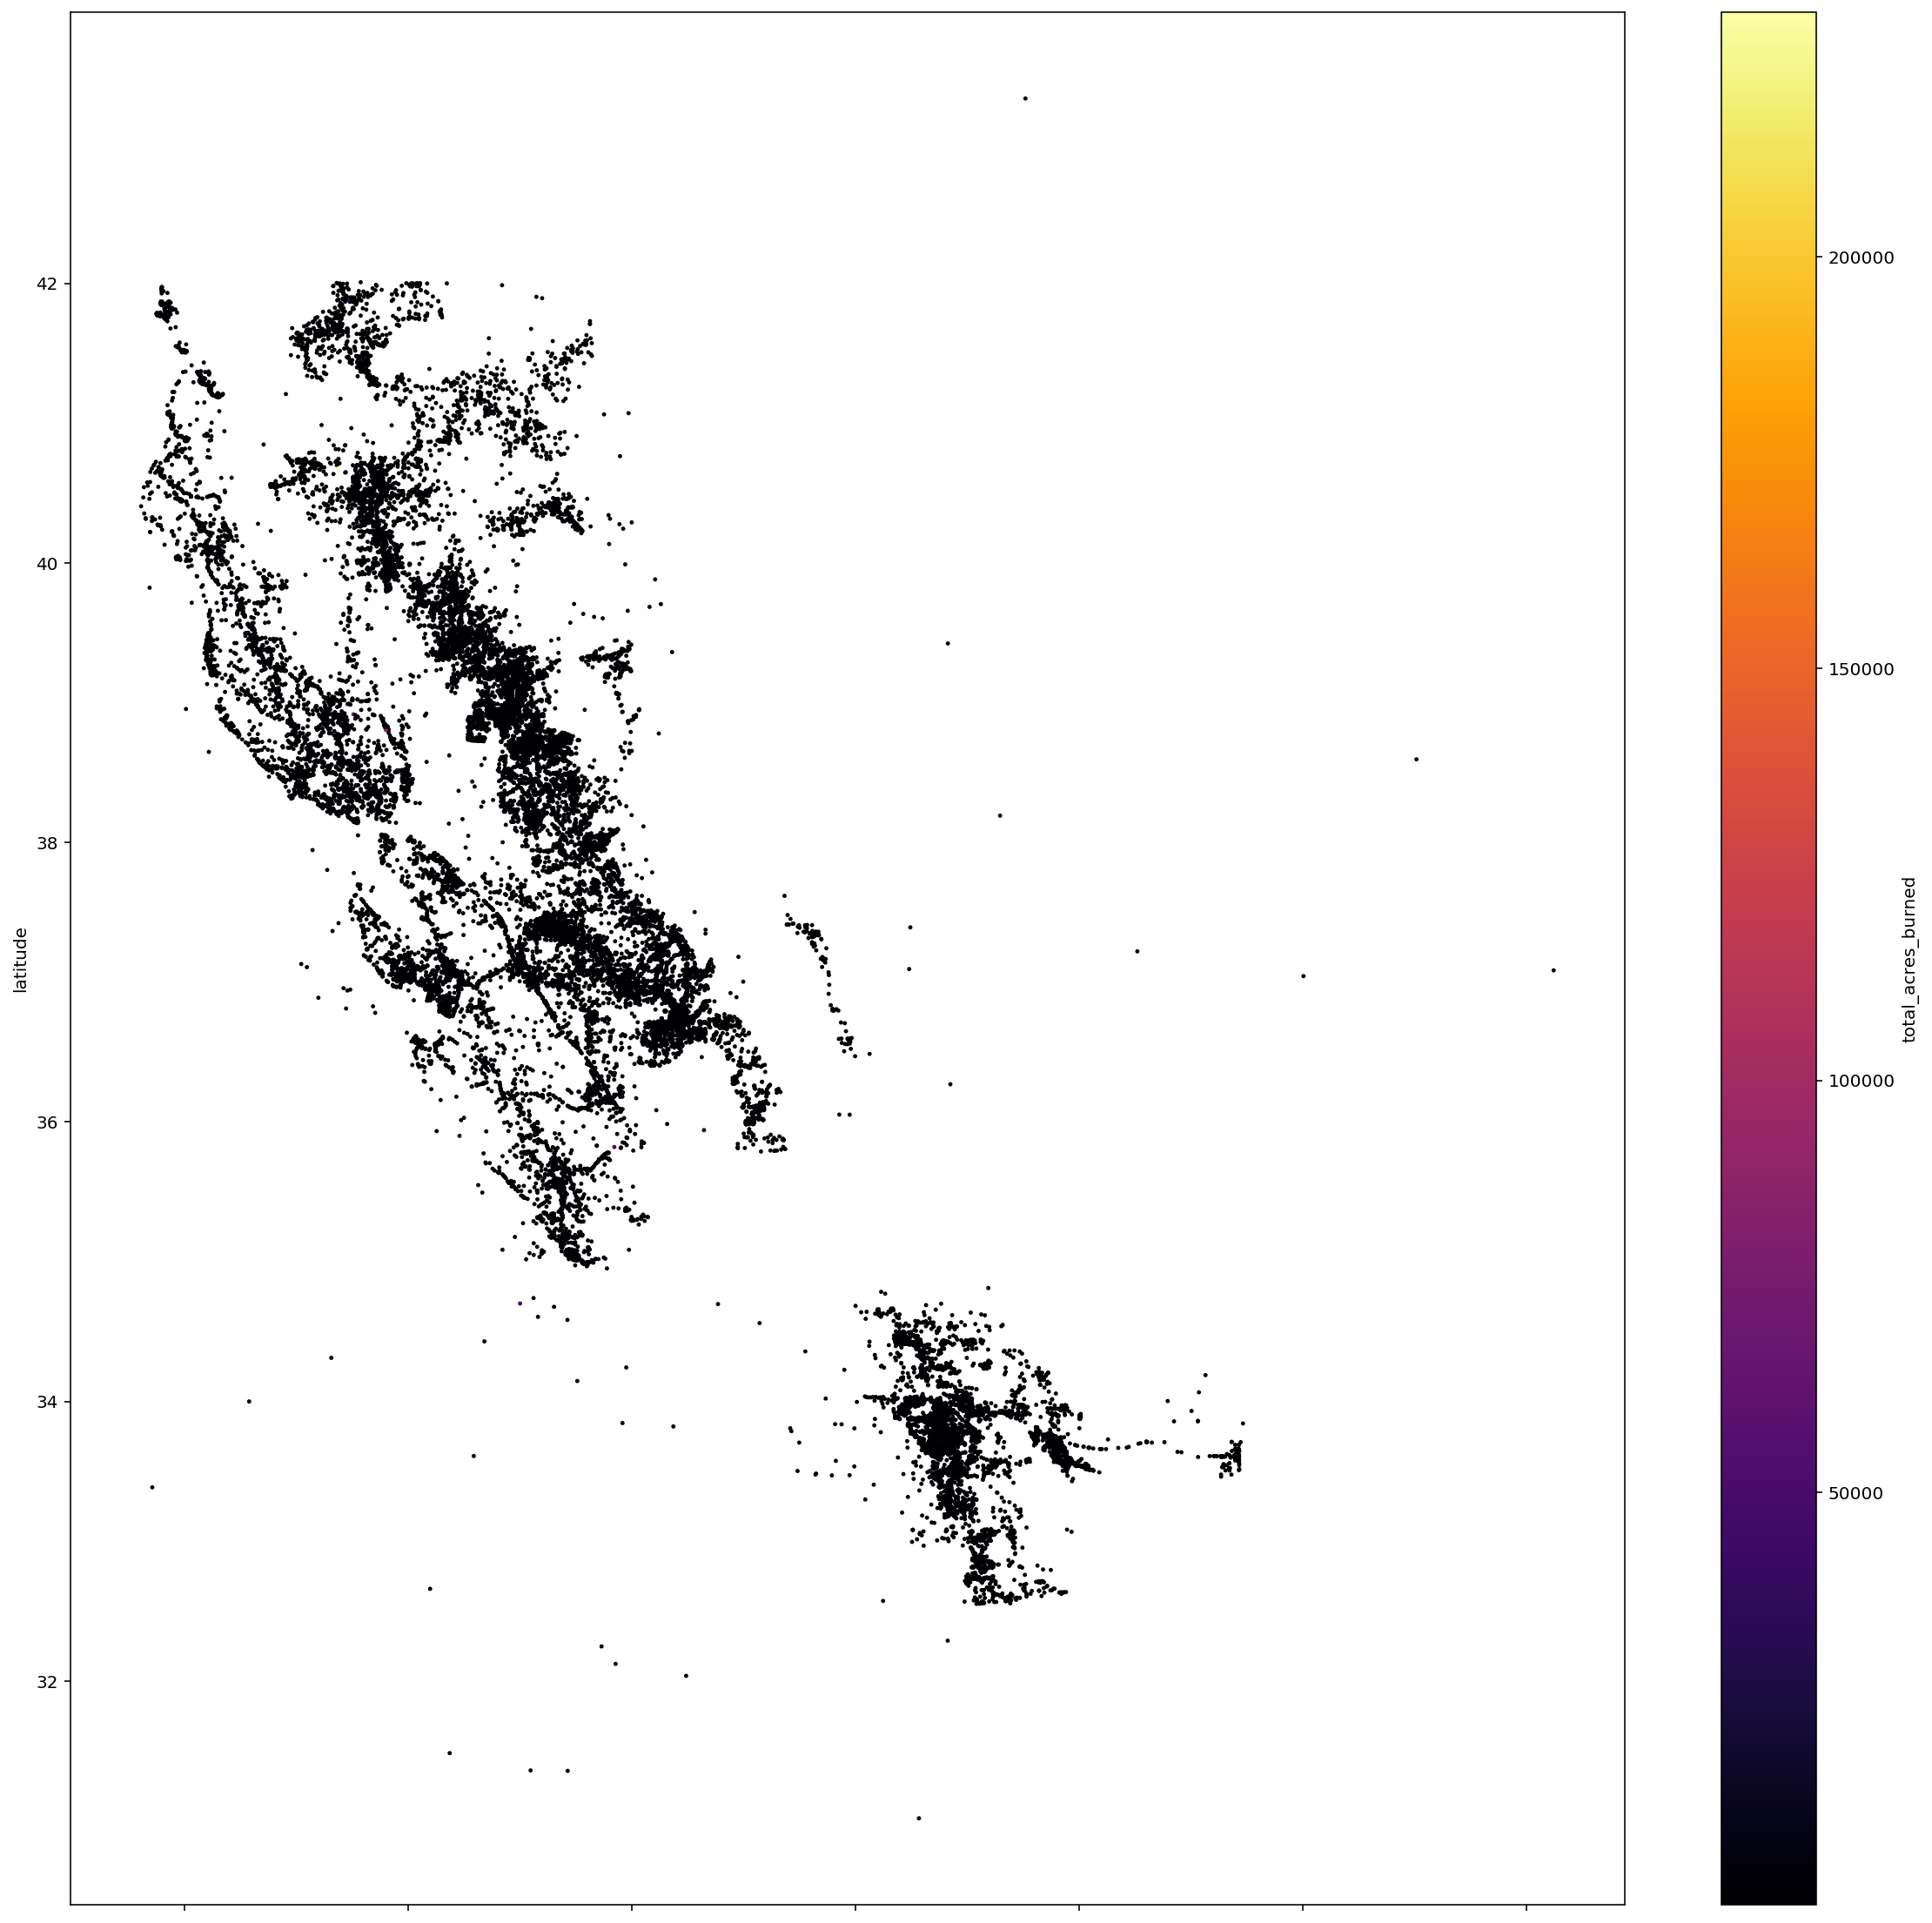

In [16]:
df.plot(kind="scatter", x="longitude", y="latitude", c="total_acres_burned",
         cmap="inferno",  figsize=(20, 20), s=2);

In [17]:
df.type_descriptions.value_counts()

    Grass fire, includes fire confined to area    14794
    Brush, or brush and grass mixture fire         7183
    Natural vegetation fire, other                 4447
    Forest, woods, or wildland fire                4109
    Unauthorized burning                            760
    Cultivated trees or nursery stock fire          131
    Cultivated vegetation, crop fire, other         127
    Cultivated grain or crop fire                   119
    Cultivated orchard or vineyard fire             107
Name: type_descriptions, dtype: int64

In [18]:
# df.plot(kind="scatter", x="longitude", y="latitude", c="",
#          cmap="inferno",  figsize=(20, 20), s=2);

In [19]:
string_columns = ['fire_department_name', 'incident_name','incident_number',
                  'county', 'street_address',
                  'city', 'state', 'zip',
                  'burn_duration', 'cause', 'incident_number',
                 'type_descriptions', 'cross_streets_or_directions_or_national_grid',
                 'containment_date']

# TRAIN TEST SPLIT

In [33]:
X = df.drop(columns= string_columns)
y = np.log(df.burn_duration)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.5
)

In [34]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [35]:
pca = PCA(random_state=42)

In [36]:
Z_train = pca.fit_transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

In [37]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(var_exp[:20], 3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp =np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:20], 3)}')

Explained variance (first 20 components): [0.016 0.012 0.011 0.011 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01 ]

Cumulative explained variance (first 20 components): [0.016 0.028 0.039 0.049 0.06  0.07  0.081 0.091 0.101 0.111 0.122 0.132
 0.142 0.152 0.162 0.173 0.183 0.193 0.203 0.213]


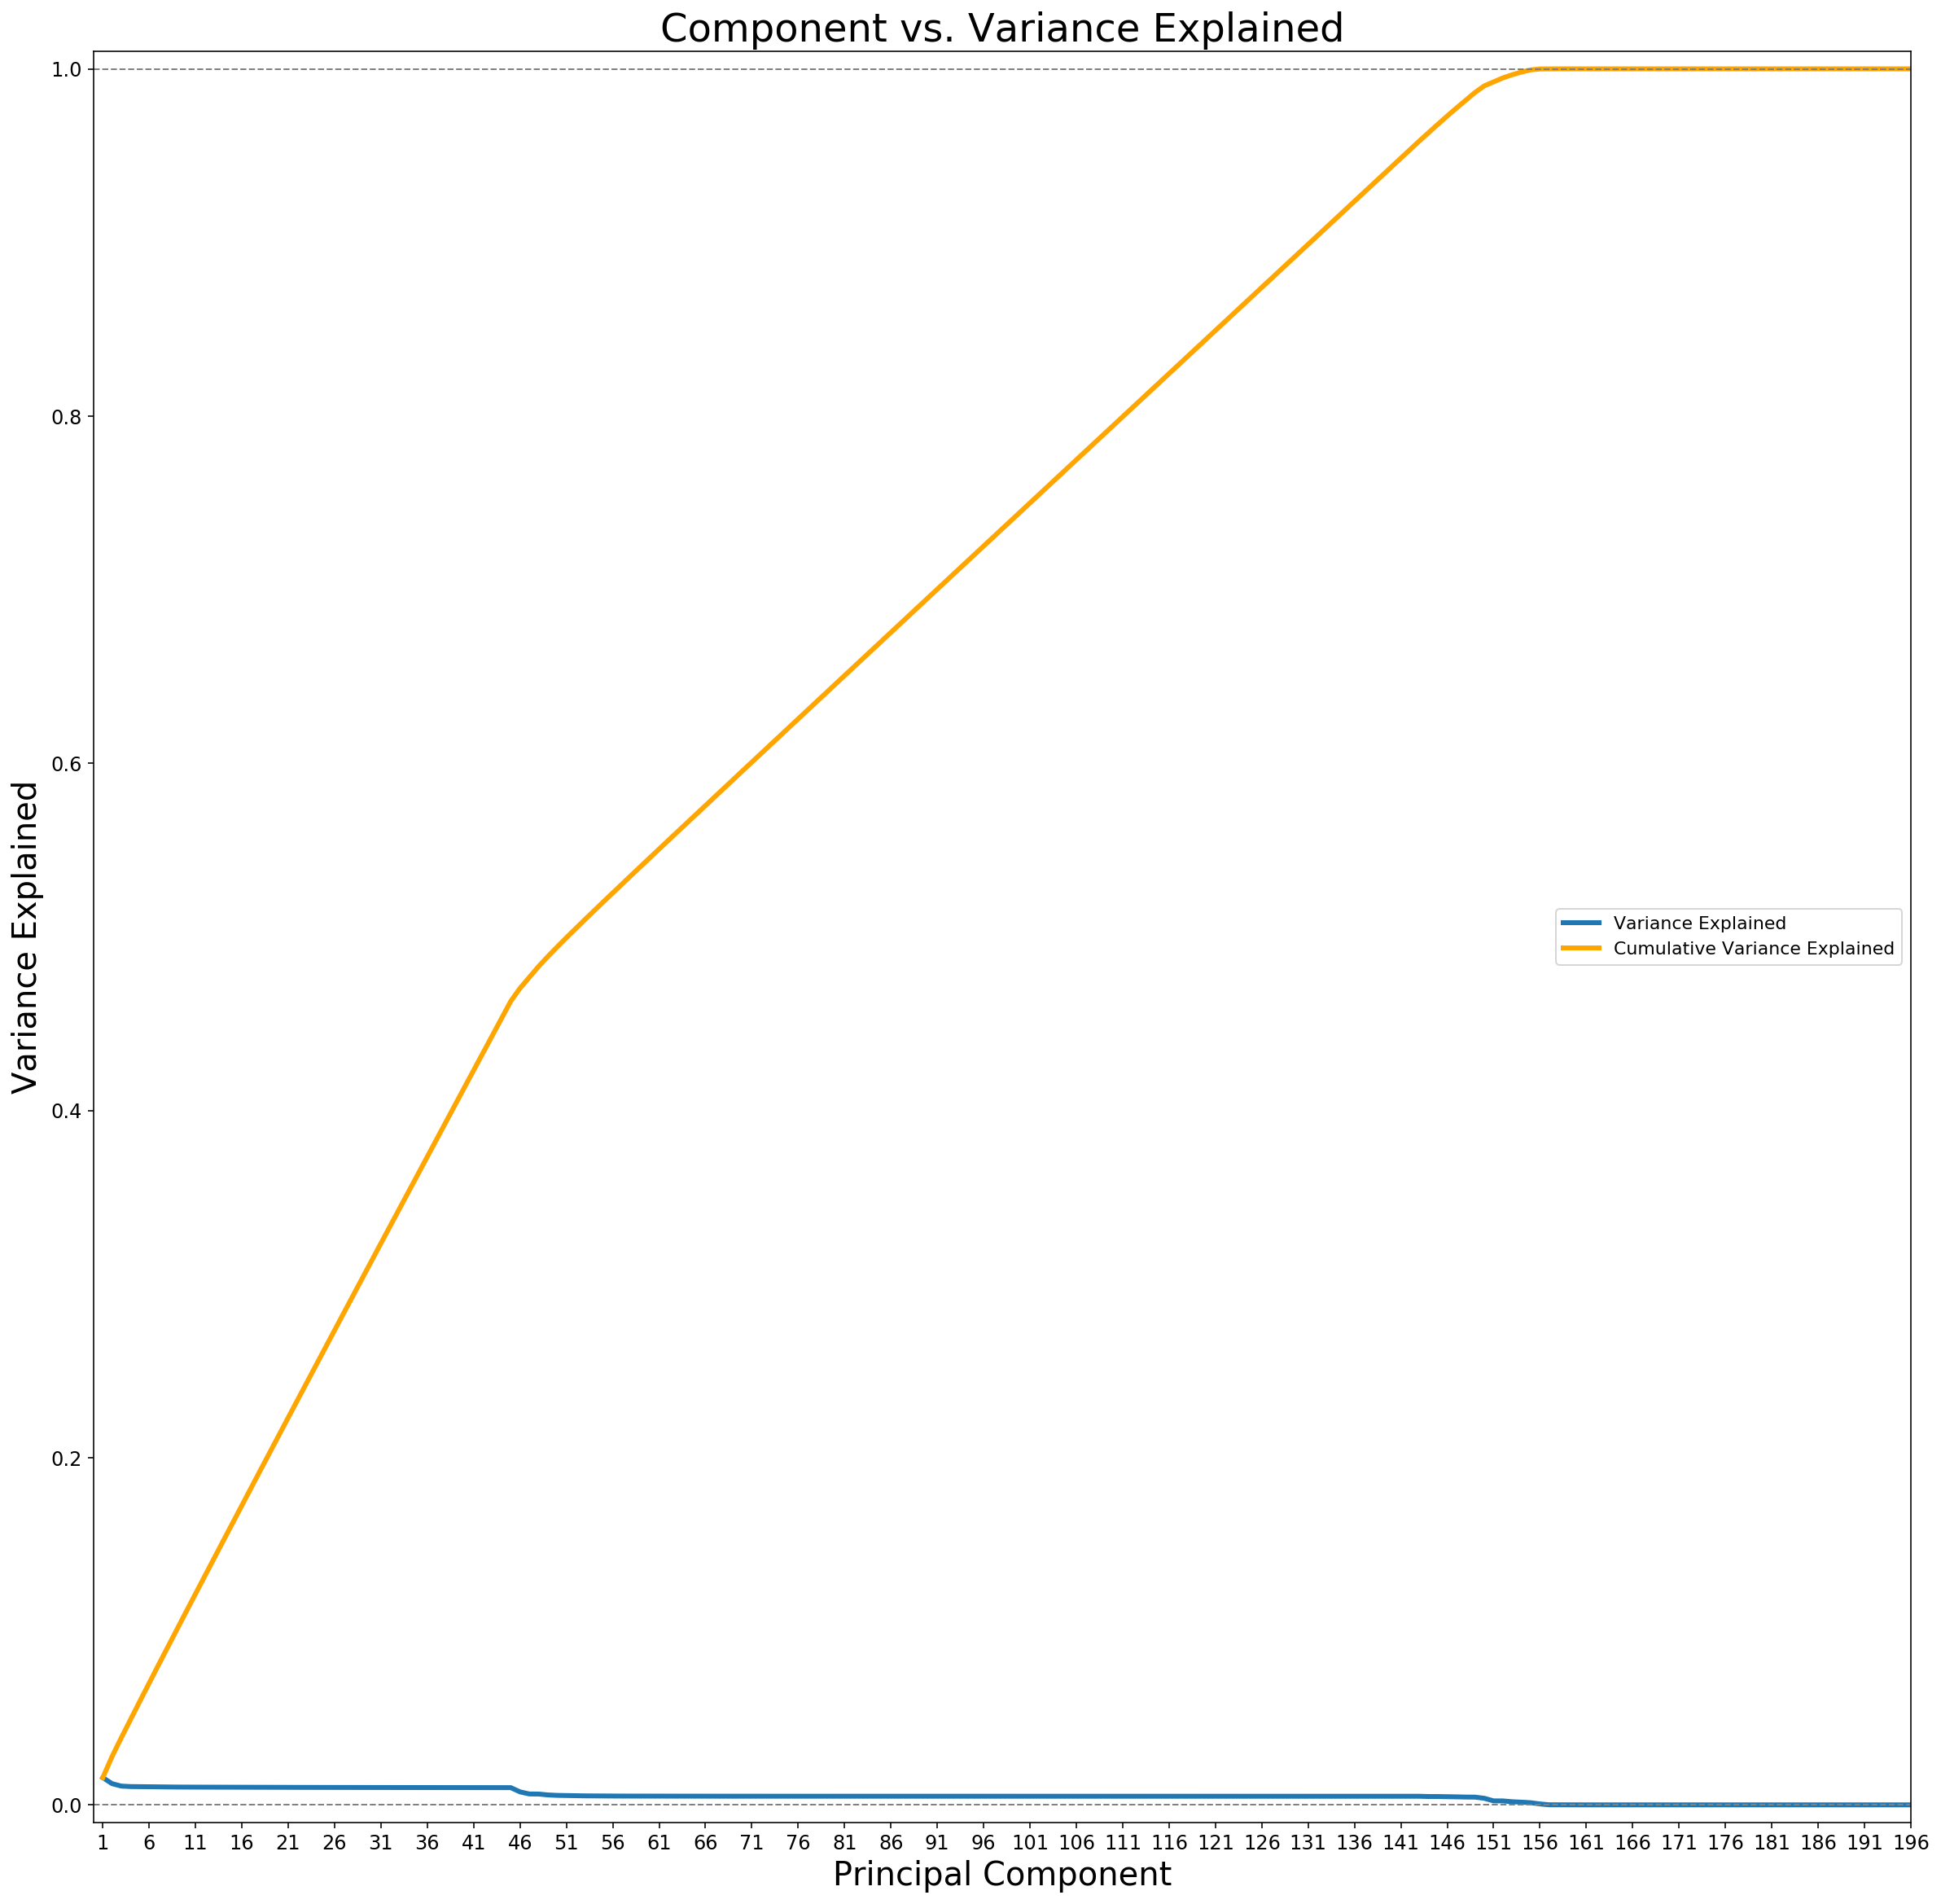

In [38]:
# Plot the variance explained (and cumulative variance explained).

# Set figure size.
plt.figure(figsize=(20,20))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 200, 5), range(1, 200, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [39]:
pca = PCA(n_components=146)

# Fit PCA to training data.
pca.fit(X_train)
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

In [42]:
rf = RandomForestRegressor()

rf.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(rf.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(rf.score(Z_test, y_test),4)}')

Training Score: 0.8353
Testing Score: -0.1339


In [40]:
lm = LinearRegression()
lm.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lm.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(lm.score(Z_test, y_test),4)}')

Training Score: 0.0149
Testing Score: -0.0043


In [ ]:
# knr = KNeighborsRegressor()

# X_train_sc = ss.fit_transform(X_train)
# X_test_sc = ss.transform(X_test)
# knr.fit(X_train_sc, y_train)
# print(f'Score on training set: {knr.score(X_train_sc, y_train)}')
# print(f'Score on training set: {knr.score(X_test_sc, y_test)}')

Score on training set: 0.210902343935656


In [41]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
print(f'Score on training set: {abr.score(Z_train, y_train)}')
print(f'Score on testing set: {abr.score(Z_test, y_test)}')

ValueError: Number of features of the model must match the input. Model n_features is 1391 and input n_features is 146 

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
print(f'Score on training set: {svr.score(Z_train, y_train)}')
print(f'Score on testing set: {svr.score(Z_test, y_test)}')

In [31]:
model.fit(Z_test, y_test)
print(f'Score on training set: {model.score(Z_train, y_train)}')
print(f'Score on testing set: {model.score(Z_test, y_test)}')

Score on training set: -3.611114459800821
Score on testing set: 0.011377252802860728


In [30]:
model = LinearRegression()
model.fit(X_train_sc, y_train)
print(f'Score on training set: {model.score(Z_train, y_train)}')
print(f'Score on testing set: {model.score(Z_test, y_test)}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1391 is different from 146)

In [ ]:
X_train_sc.shape

In [ ]:
print(model.score(X_train_sc, y_train))
print(model.score(X_test_sc, y_test))

In [567]:
df.type_descriptions.value_counts()

    Grass fire, includes fire confined to area    14794
    Brush, or brush and grass mixture fire         7183
    Natural vegetation fire, other                 4447
    Forest, woods, or wildland fire                4109
    Unauthorized burning                            760
    Cultivated trees or nursery stock fire          131
    Cultivated vegetation, crop fire, other         127
    Cultivated grain or crop fire                   119
    Cultivated orchard or vineyard fire             107
Name: type_descriptions, dtype: int64

In [643]:
geo = pd.get_dummies(df[['longitude', 'latitude', "type_descriptions", 'cause']])
geo.head()

,longitude,latitude,"type_descriptions_ Brush, or brush and grass mixture fire",type_descriptions_ Cultivated grain or crop fire,type_descriptions_ Cultivated orchard or vineyard fire,type_descriptions_ Cultivated trees or nursery stock fire,"type_descriptions_ Cultivated vegetation, crop fire, other","type_descriptions_ Forest, woods, or wildland fire","type_descriptions_ Grass fire, includes fire confined to area","type_descriptions_ Natural vegetation fire, other",...,cause_Lightning,cause_MISCELLANEOUS,cause_Miscellaneous,cause_Playing with Fire,cause_RAILROAD,cause_Railroad,cause_SMOKING,cause_Smoking,cause_Undetermined,cause_Vehicle
start_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,-117.286983,33.840233,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 00:00:00,-116.127000,33.964933,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,-117.523467,34.446983,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,-119.353167,37.043217,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,-117.252050,33.589333,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [644]:
df.shape

(31777, 1404)

In [647]:
# pipe = Pipeline([
#     ('sc', StandardScaler()),
#     ('pc', PCA()),
#     ('lr', LogisticRegression(penalty='none', solver='lbfgs', random_state=42)),
    
# ])

In [648]:
# pipe.get_params()

In [649]:
# kf = KFold(n_splits=5, shuffle=True, random_state=17)

In [650]:
# gs.best_params_

In [ ]:
db_model = DBSCAN(eps = .02, min_samples=4)
db_model.fit(geo)

In [652]:
# db_model.fit(X_train, y_train)

In [ ]:
df.head()

## Pipeline

In [418]:
# pipe = Pipeline([
#     ('sc', StandardScaler()),
#     ('pc', PCA()),
#     ('rf', RandomForestRegressor()),
    
# ])

In [665]:
rf = RandomForestRegressor()

In [666]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [695]:
pgrid = {
    'pc__n_components':np.arange(1, 201, 10),
    'rf__min_samples_split' :[2,3,4],
    'rf__n_estimators':[100],
    'rf__min_samples_leaf':[1]

}

gs = GridSearchCV(pipe, pgrid, cv=rf, scoring='r2', return_train_score=False, n_jobs=2)

gs.fit(X_train, y_train)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [423]:
grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)

NameError: name 'parameteres' is not defined

In [702]:
t0 = time.time()
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print(f'took {(time.time() - t0)/60} minutes')

took 1.3278863032658894 minutes


In [704]:
print(f'Score on training set: {rf.score(X_train, y_train)}')
print(f'Score on testing set: {rf.score(X_test, y_test)}')

Score on training set: 0.8483418586299727
Score on testing set: -0.06813596376558206


In [703]:
rf.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)>

In [739]:
br = BaggingRegressor()
br.fit(X_train, y_train)
print(f'Score on training set: {br.score(X_train, y_train)}')
print(f'Score on testing set: {br.score(X_test, y_test)}')

Score on training set: 0.793860841504994
Score on testing set: -0.15000374127412996


In [740]:
# t0 = time.time()
# rf = RandomForestRegressor(random_state=42)
# rf_params = {
#     'n_estimators':[100,125],
#     "max_depth" : [None, 4],
#     'max_features' : [None, #bagging
#                      'auto'] #random forest
    
# }
# gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
# gs.fit(X_train_sc, y_train)
# print(gs.best_score_) # cross val score
# gs.best_params_
# print(f'took {(time.time() - t0)/60} minutes')

## /Pipeline

In [398]:
# km = KMeans(n_clusters=1000)
# km.fit(geo)

In [473]:
# def db_search(eps_range, sample_range, df):
#     n=0
#     eps_list = []
#     sample_size_list = [] 
#     num_clust_list = []
#     for eps_value in eps_range:
#         for sample_size in sample_range:
#             model = DBSCAN(eps = eps_value, min_samples = sample_size)
#             model.fit(df)
#             num_clusters = len(set(model.labels_))
#             n+=1
#             eps_list.append(eps_value)
#             sample_size_list.append(sample_size)
#             num_clust_list.append(num_clusters)
            
#         if n%10 == 0:
#             print("10 complete")
            
#     db_search_df = pd.DataFrame({
#         'eps': eps_list,
#         'sample_size': sample_size_list,
#         'number_o_clusters': num_clust_list
        
#     })
#     return db_search_df

In [492]:
# eps_range_ex = list(np.linspace(0.2,4, 40))
# sample_range = list(range(1,11))

In [479]:
#eps_range_ex

In [474]:
# db_search_df_sample = db_search(list(np.linspace(0.1,1, 10)), [1], geo)

10 complete


In [476]:
# db_search_df_sample

,eps,sample_size,number_o_clusters
0,0.1,1,1193
1,0.2,1,383
2,0.3,1,207
3,0.4,1,140
4,0.5,1,109
5,0.6,1,88
6,0.7,1,72
7,0.8,1,59
8,0.9,1,48
9,1.0,1,42


In [485]:
# db_search_df_2 = db_search(list(np.linspace(0.01,.2, 10)), sample_range, geo)
# db_search_df_2

10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete
10 complete


,eps,sample_size,number_o_clusters
0,0.01,1,17710
1,0.01,2,4336
2,0.01,3,2065
3,0.01,4,1152
4,0.01,5,739
...,...,...,...
95,0.20,6,71
96,0.20,7,63
97,0.20,8,60
98,0.20,9,57


In [654]:
db_model = DBSCAN(eps = .1, min_samples=5)
db_model.fit(geo)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

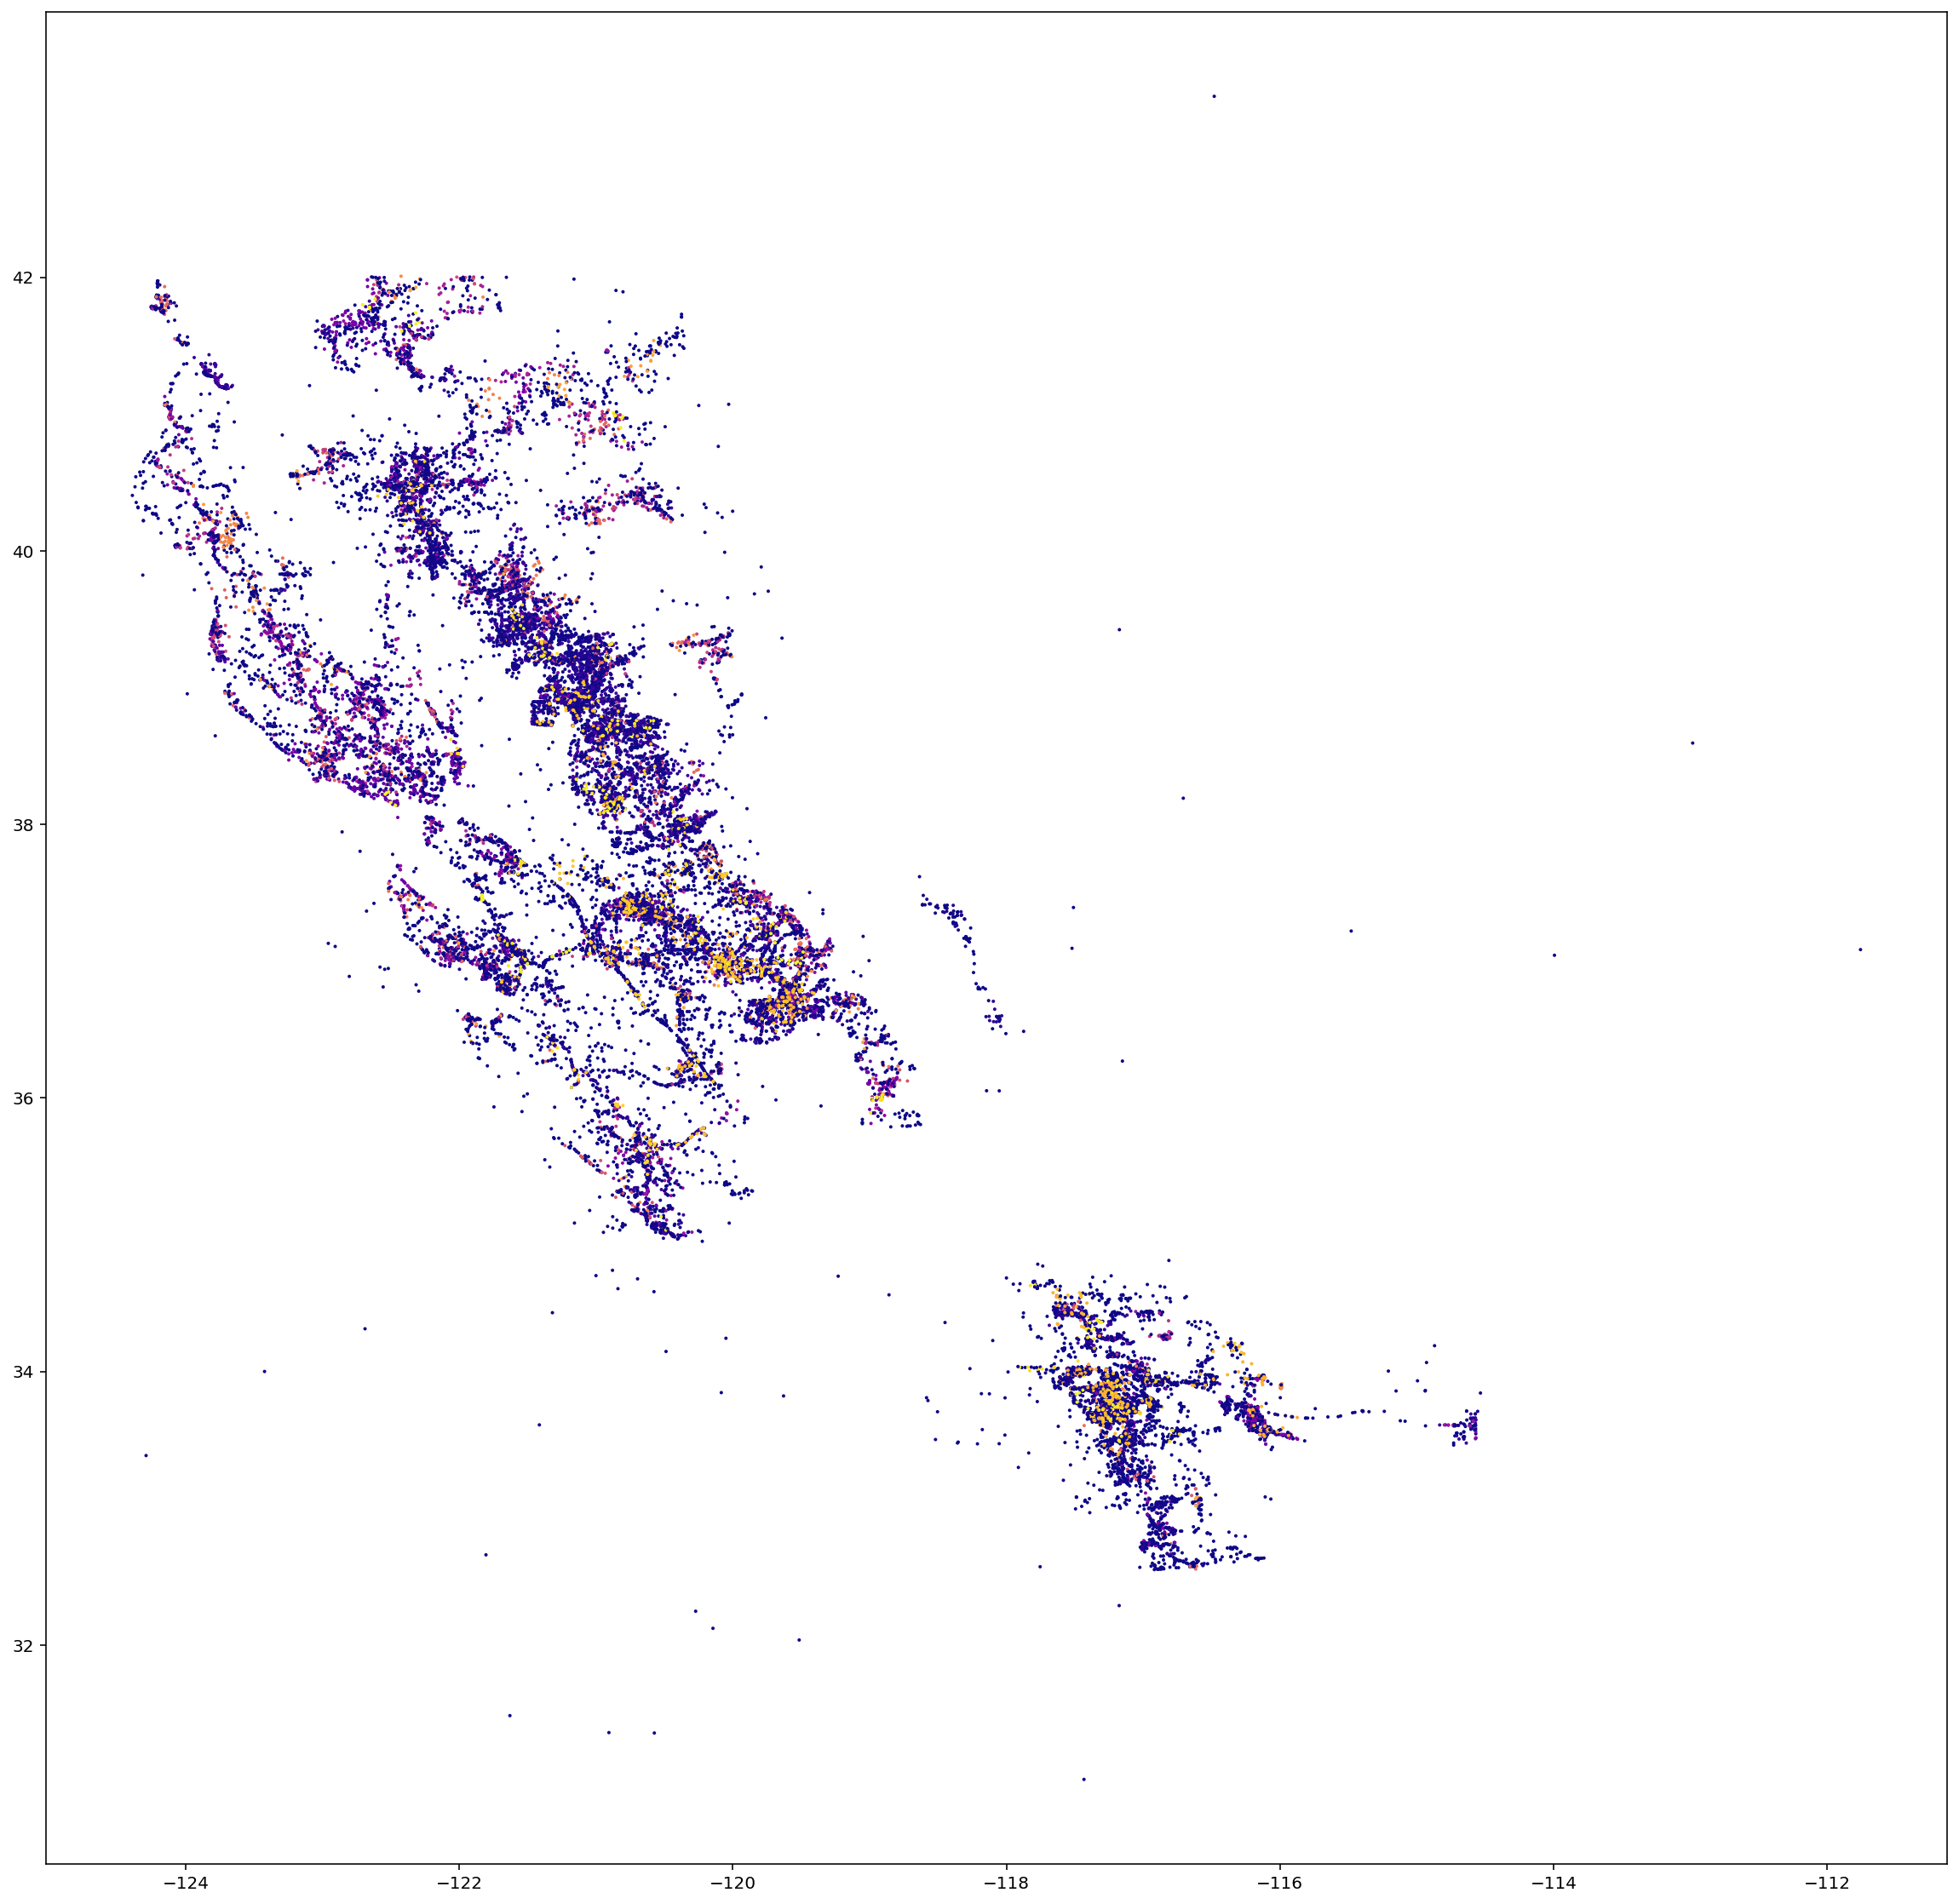

In [655]:
plt.figure(figsize=(20, 20))
plt.scatter(df['longitude'], df['latitude'], c=db_model.labels_, s=1, cmap="plasma");

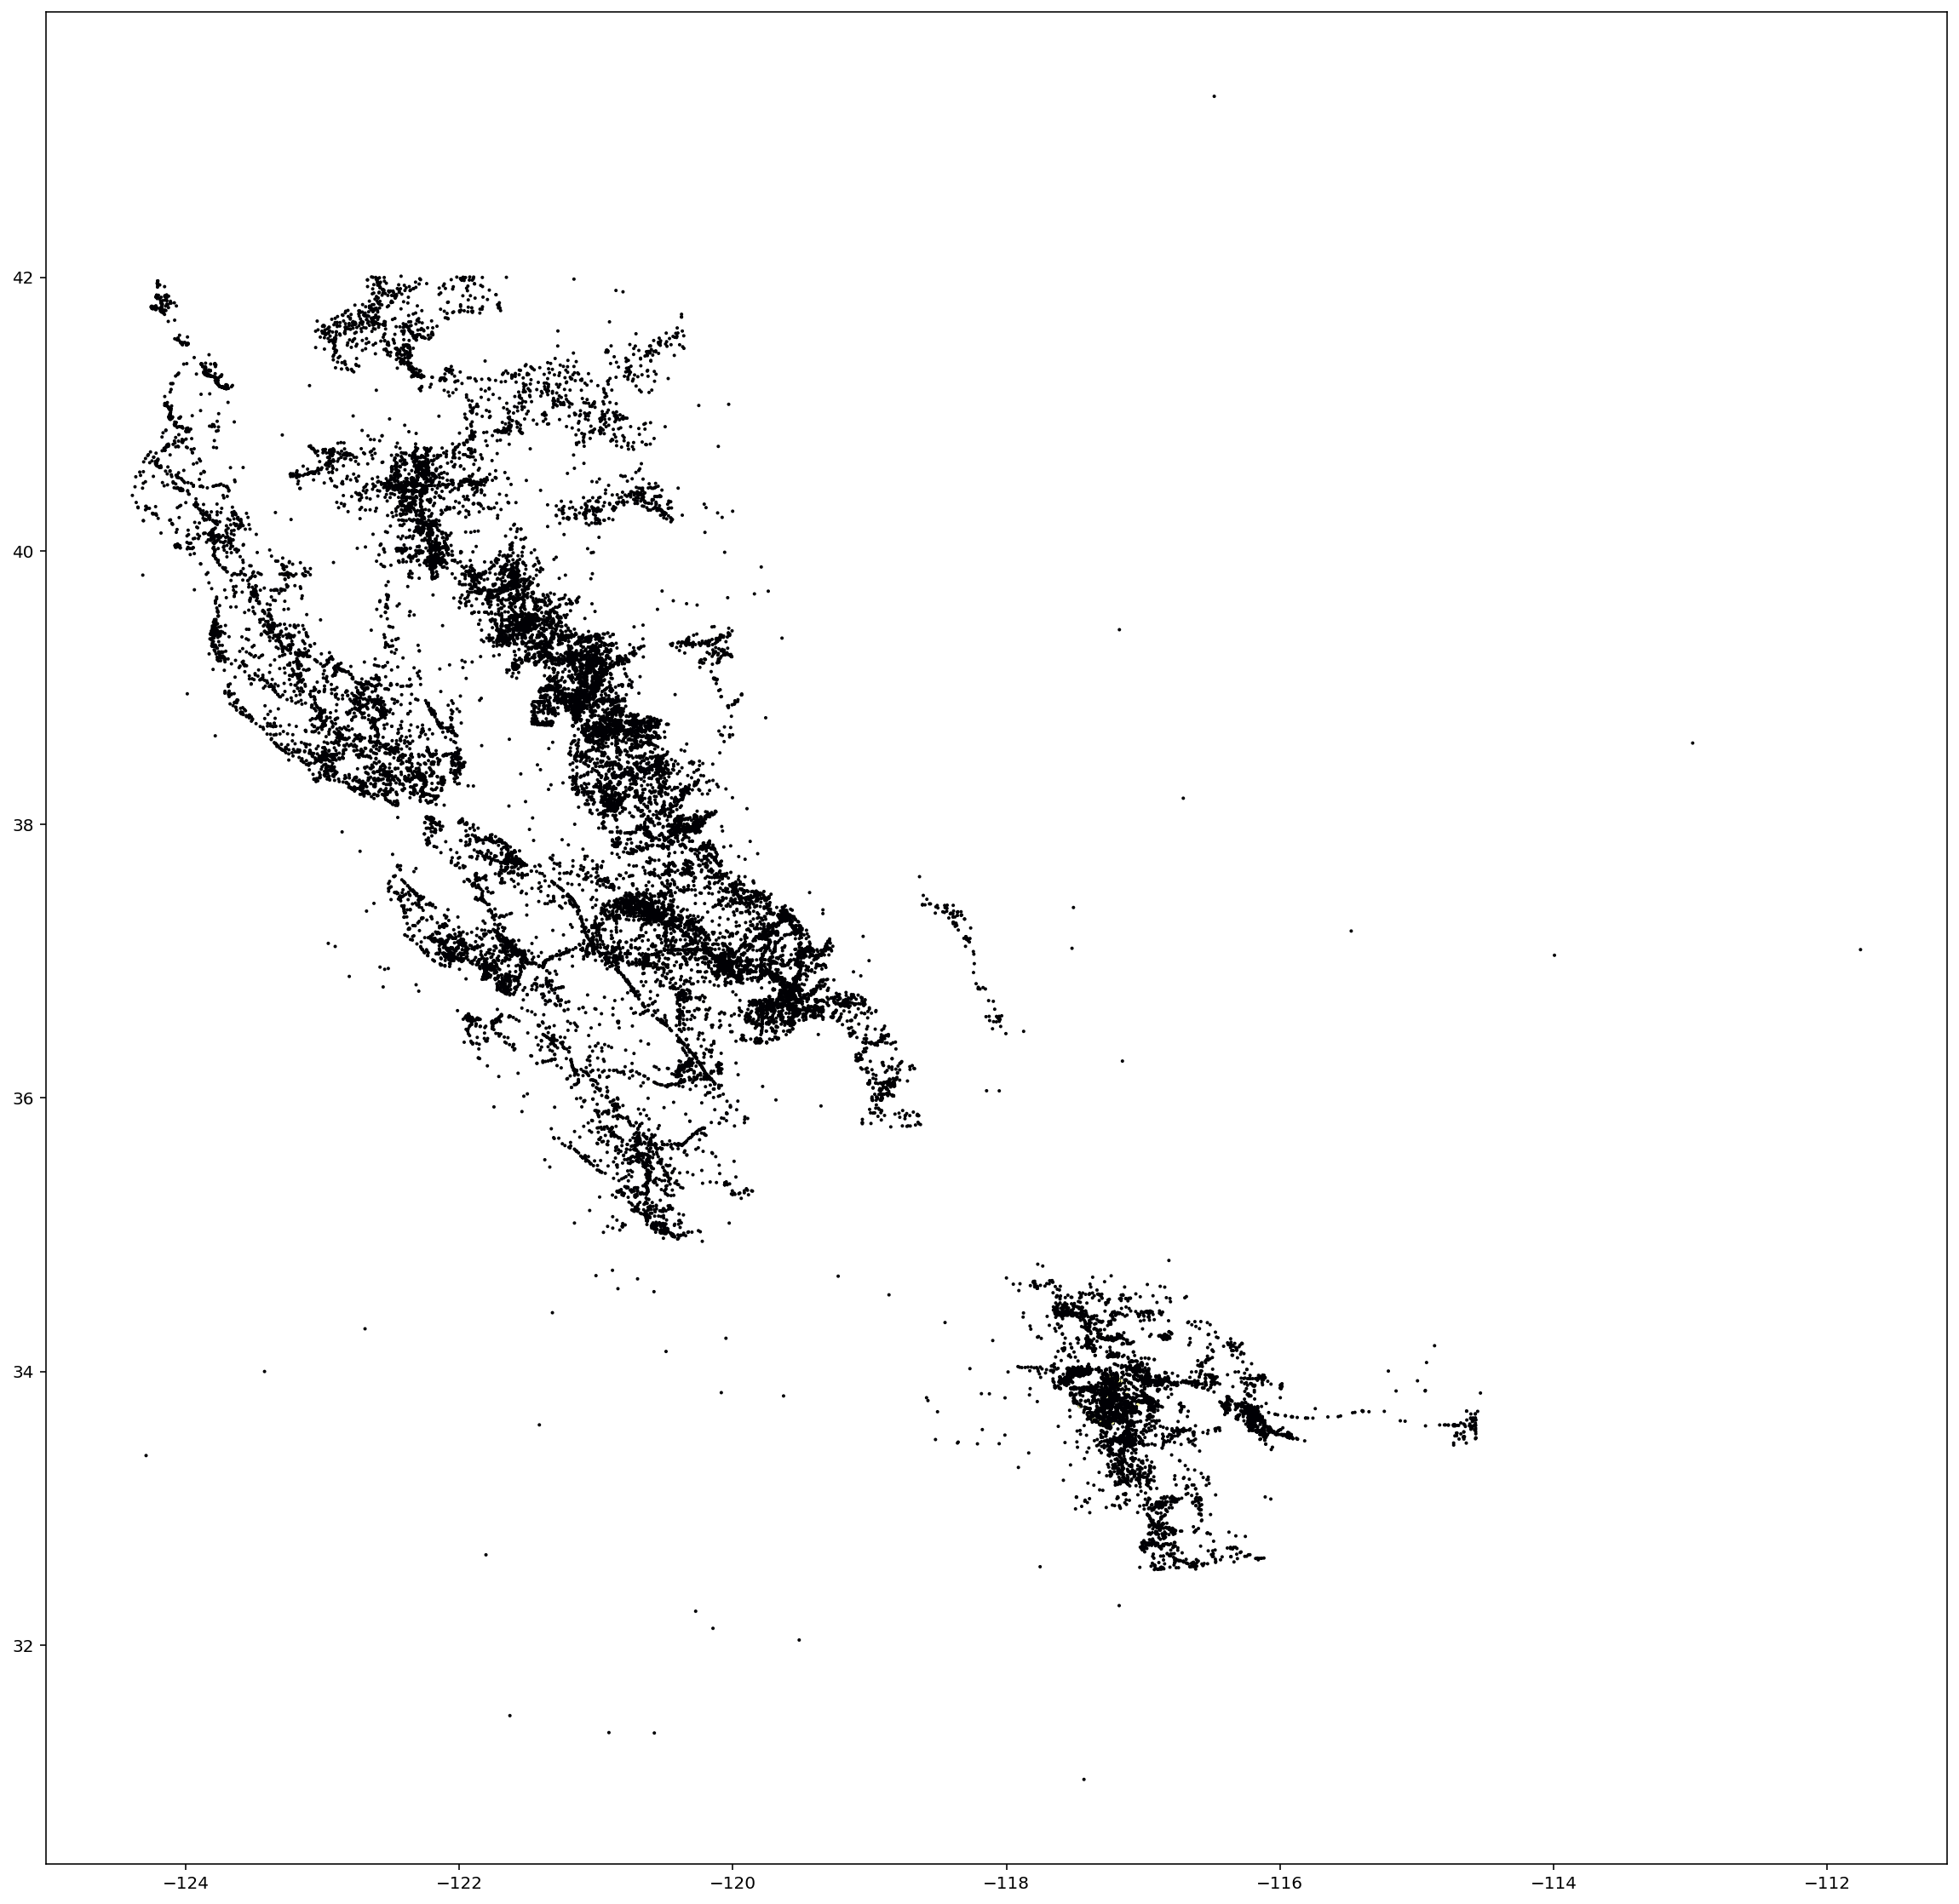

In [656]:
plt.figure(figsize=(20, 20))
plt.scatter(df['longitude'], df['latitude'], c=db_model.labels_==7, s=1, cmap="inferno");

In [658]:
len(set(db_model.labels_))

767

In [541]:
pd.DataFrame(db_model.labels_)[0].value_counts()

 7      10091
 6       2764
 1       2132
 4       1793
-1       1651
        ...  
 225        5
 168        5
 200        5
 195        5
 223        5
Name: 0, Length: 234, dtype: int64

In [545]:
X['cluster'] = db_model.labels_
X = pd.get_dummies(columns=['cluster'], data=X, drop_first=True)

In [546]:
# X['cluster'] = km.labels_
# X = pd.get_dummies(columns=['cluster'], data=X, drop_first=True)


In [547]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5, shuffle = False
)

In [550]:
model20 = RandomForestRegressor()
model20.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [551]:
print(model20.score(X_train, y_train))
print(model20.score(X_test, y_test))

0.8441822241747107
-0.10648736739134734


In [741]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [742]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.21279838810913387
-0.17550720308103981


In [552]:
def transfer_tune(X, y, k):
    location_data = df[["longitude", "latitude"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.5
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [ ]:
for k in range(2800, 3100, 50):
    transfer_tune(X, y, k)

In [344]:
for k in range(2000, 3000, 100):
    transfer_tune(X, y, k)

2000 : -0.12147990983252079
2100 : -0.127802427442546
2200 : -4148436.5551800705
2300 : -0.162202695615715
2400 : -0.16013209693546693
2500 : -0.17494237616373343
2600 : -0.1748065618664172
2700 : -1459504.3326410225


KeyboardInterrupt: 

In [ ]:
oh = OneHotEncoder(categories="auto", sparse=False)
oh.fit(km.labels_.reshape(-1, 1))

In [ ]:
dummy_matrix = oh.transform(km.labels_.reshape(-1, 1))

In [ ]:
oh.transform(X_test)

In [708]:
df.shape

(31777, 1404)

,fire_department_name,incident_number,exposure_number,incident_name,year,containment_date,county,street_address,city,state,...,Sonoma_y,Stanislaus_y,Sutter_y,Tehama_y,Trinity_y,Tulare_y,Tuolumne_y,Ventura_y,Yolo_y,Yuba_y
start_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,RIVERSIDE CFD,16,0,CASTLEROCK TRL MEAD,2013,2013-01-01 00:27:00,Riverside,00019275 CASTLEROCK TRL,MEAD,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-01 00:00:00,RIVERSIDE CFD,312,0,DATE PALM,2013,2013-01-01 19:03:00,Riverside,00065150 DATE PALM ST,MECC,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,CDF-SAN BERNARDINO,194,0,LA MIRADA RD PHELAN,2013,2013-01-05 19:27:00,San Bernardino,00010820 LA MIRADA RD,PHELAN,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,CDF-FRESNO,215,0,AUBERRY RD / ALDER HEIGHT,2013,2013-01-05 16:55:00,Fresno,00036709 PETERSON RD,Tollhouse,CA,...,0,0,0,0,0,0,0,0,0,0
2013-01-05 00:00:00,WILDOMAR FIRE DEPARTMENT,1752,0,PALOMAR,2013,2013-01-05 12:59:00,Riverside,00022800 PALOMAR ST,WILD,CA,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
PCA()